In [0]:
# перезагрузить ноутбук
!kill -9 -1



---



---



# Определяем координаты центров тишины. 
Эти координаты будут использованы для разрезания аудиопотока на части - фразу делим на слова

In [1]:
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git

Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 91 (delta 4), reused 0 (delta 0), pack-reused 67
Unpacking objects: 100% (91/91), done.


In [2]:
!pip install pydub

In [3]:
!pip install soundfile

In [0]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

import soundfile as sf
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt

#import numpy
#import numpy as np

In [0]:
a = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], int)



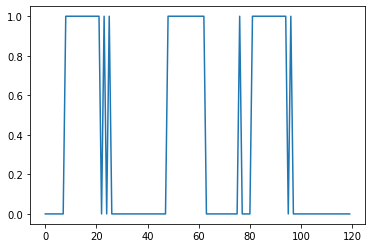

In [6]:
plt.plot(a)
plt.show()

Решение берем отсюда: https://younglinux.info/python/task/id-range

In [7]:

#def my_function(a): # задаем массив
   
count = 0
max_count = 0
index = 0
i = 0 
while i < len(a):
	if a[i] == 1:
		count += 1
	else:
		if count > max_count:
			max_count = count
			index = i-1 # последовательность закончилась на предыдущем элементе
		count = 0
	i += 1

  
 
print("Количество элементов: ", max_count)
print("id первого элемента: ", index-max_count+1)
print("id последнего элемента: ", index)
print("середина", int(round(index - max_count/2)))

Количество элементов:  15
id первого элемента:  48
id последнего элемента:  62
середина 54


In [8]:
int(round(index - max_count/2))

54

In [9]:
a[index-max_count+1:index] # items start through end-1


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

ОБнуляем полученное единички. ищем следущую самую длинную последовательность единичек

In [0]:

a[index-max_count+1:index] = 0 #ОБнуляем полученное единички. 

In [0]:
a1 = a


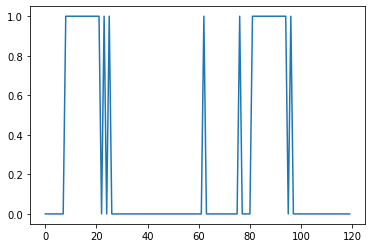

In [12]:
plt.plot(a1)
plt.show()

In [0]:
a2 = a1.copy()
a = a2

In [14]:
count = 0
max_count = 0
index = 0
i = 0 
while i < len(a):
	if a[i] == 1:
		count += 1
	else:
		if count > max_count:
			max_count = count
			index = i-1 # последовательность закончилась на предыдущем элементе
		count = 0
	i += 1
 
print("Количество элементов: ", max_count)
print("id первого элемента: ", index-max_count+1)
print("id последнего элемента: ", index)
print("середина", int(round(index - max_count/2)))

Количество элементов:  14
id первого элемента:  8
id последнего элемента:  21
середина 14


In [0]:
a[index-max_count+1:index] = 0 #ОБнуляем полученное единички. 

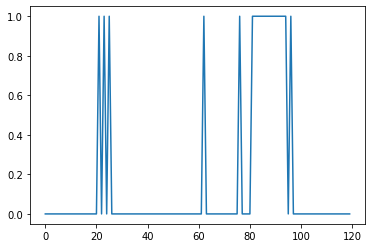

In [16]:
plt.plot(a)
plt.show()

In [0]:
# делаем копию и запускаем снова
a3 = a.copy()
a = a3

In [18]:
count = 0
max_count = 0
index = 0
i = 0 
while i < len(a):
	if a[i] == 1:
		count += 1
	else:
		if count > max_count:
			max_count = count
			index = i-1 # последовательность закончилась на предыдущем элементе
		count = 0
	i += 1
 
print("Количество элементов: ", max_count)
print("id первого элемента: ", index-max_count+1)
print("id последнего элемента: ", index)
print("середина", int(round(index - max_count/2)))

Количество элементов:  14
id первого элемента:  81
id последнего элемента:  94
середина 87


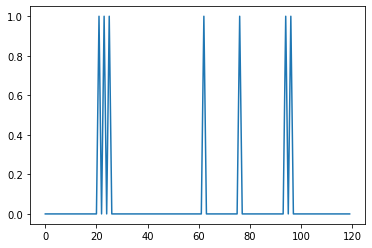

In [19]:
a[index-max_count+1:index] = 0 #ОБнуляем полученное единички.
# делаем копию и запускаем снова
a4 = a.copy()
a = a4
plt.plot(a)
plt.show()

In [20]:
count = 0
max_count = 0
index = 0
i = 0 
while i < len(a):
	if a[i] == 1:
		count += 1
	else:
		if count > max_count:
			max_count = count
			index = i-1 # последовательность закончилась на предыдущем элементе
		count = 0
	i += 1
 
print("Количество элементов: ", max_count)
print("id первого элемента: ", index-max_count+1)
print("id последнего элемента: ", index)
print("середина", int(round(index - max_count/2)))

Количество элементов:  1
id первого элемента:  21
id последнего элемента:  21
середина 20


у нас периоды звука не сильно отличаются друг от друга.

Длина звука - это в нашем случае количество элементов.
Звуки 1, 2, 3 имеют 14 индексов (количество элементов), а звук 4 - 1 элемент. 
Это означает, что более или менее длиные звуки кончились. 
Можем воспользоваться этим как сигналом для остановки поиска новых слов во фразе.
Если отношение (количество элементов для первого звука / количеств элементов следующего звука) > 2, то функцию поиска середины звука останавливаем

ИТОГО получили три индекса - центры звуков. 
C1 = середина 54.5
C2 = середина 14.0
C3 = середина 87.0

Будем искать линии разрезов
Первый разрез T0 = 0


In [21]:
C1 = 54 # взято для примера, обработка файла 'seg_no_bed_bird.wav'
C2 = 14
C3 = 87

Center_list  = [C1, C2, C3]
print(Center_list)

# ранжируем список центров звука по возростанию
Center_list.sort()
b = sorted(Center_list)
print(b)
print(range(len(b)))

T1 = b[0]
T2 = b[1]
T3 = b[2]


[54, 14, 87]
[14, 54, 87]
range(0, 3)


Вычисляем точки разреза:

In [22]:
# для фразы из трех слов - это две точки, для фразы из трех слов - две.
# для файла 'seg_no_bed_bird.wav' - две точки.
 
S1 = round(T1 + (T2-T1)/2)
S2 = round(T2 + (T3-T2)/2)

print(S1)
print(S2)

Split_list = [S1, S2], int
print(Split_list) 



34
70
([34, 70], <class 'int'>)


In [0]:
sound = np.array([     0,      0,      0,      0,      0,      0,      0,    117,
          861,   -268,    509,   3850,   1405,   1119,  -2602,    213,
         1192,  -3022,   -337,  -1292,  -5351,   1128,    123,   1034,
         -167,   -309,     22,      7,      0,      3,      0,     -1,
            0,    -30,   -128,     63,     -5,     92,      8,    -35,
           11,     57,    -62,     -3,     47,     23,    101,     40,
        -1149,  -5153,   7368,  -9440, -13747,  -4643,   1609,   4278,
          529,    843,   2560,  -1500,   2463,    598,    264,    122,
          146,   -102,      0,      0,      0,      0,      0,      0,
            0,    -46,     28,     65,    236,     58,    -26,    133,
         -123,   1131,   3820,    237,  -3607,   -491,   3222,   3871,
        -8924,  -7897,   5990,  -1497,    904,   2201,    942,     98,
         -327,    200,   -162,    -67,     -9,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0], int)

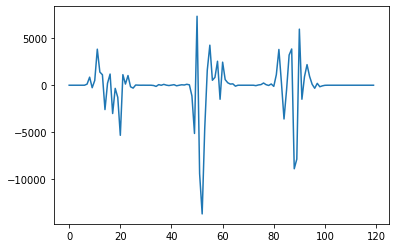

In [24]:
plt.plot(sound)
plt.show()

In [25]:
sound1 = sound[:S1]
sound1

array([    0,     0,     0,     0,     0,     0,     0,   117,   861,
        -268,   509,  3850,  1405,  1119, -2602,   213,  1192, -3022,
        -337, -1292, -5351,  1128,   123,  1034,  -167,  -309,    22,
           7,     0,     3,     0,    -1,     0,   -30])

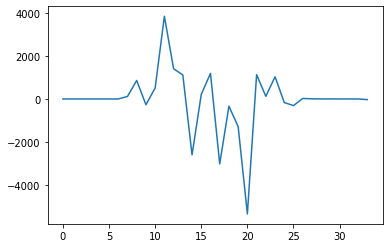

In [26]:
plt.plot(sound1)
plt.show()

In [0]:
sound2 = sound[S1:S2]

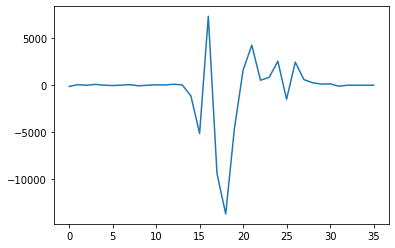

In [28]:
plt.plot(sound2)
plt.show()

In [0]:
sound3 = sound[S2:]

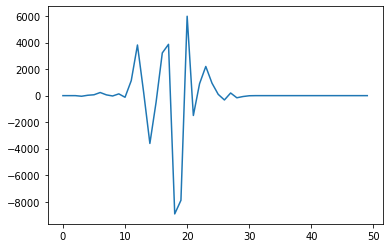

In [30]:
plt.plot(sound3)
plt.show()



---



# Переносим точки разрыва на полноценный аудиопоток 
Директорий /content/Simple-Audio-Recognition/Audio_streams/

In [31]:
import os
import numpy as np
import keras
import math
from keras.models import load_model
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt

Using TensorFlow backend.


Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 16000
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=16000, comptype='NONE', compname='not compressed')
1_no_bed_bird.wav
16000
[0 0 0 ... 0 0 0]
sound durantion =  1.0


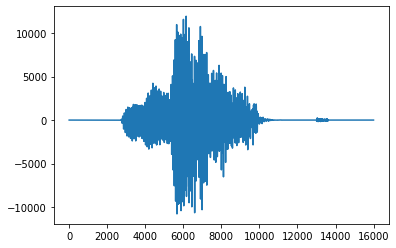

Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 16000
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=16000, comptype='NONE', compname='not compressed')
2_no_bed_bird.wav
16000
[-128 -138 -128 ...    0    0    0]
sound durantion =  1.0


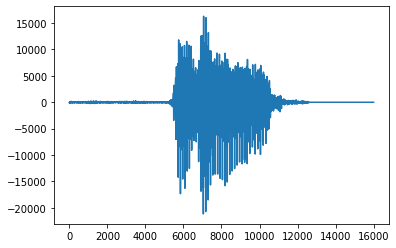

Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 12144
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=12144, comptype='NONE', compname='not compressed')
3_no_bed_bird.wav
16000
[  0   0   0 ... -19   2   0]
sound durantion =  0.759


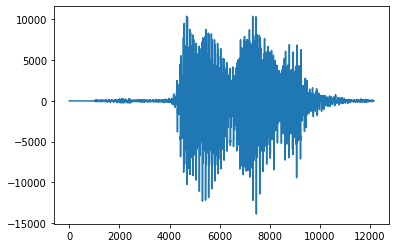

In [35]:
#__________для ПОТОКА - файлы для директория  Seg_audio_streams
sample_file ='no_bed_bird.wav'
dir_path = '/content/Simple-Audio-Recognition/Audio_streams/' #  откуда файл берется
dir_path_mod = '/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/'
#/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/
#______________________________________________

#изменяем кол-во каналов до 1 и framerate до 16000, длину сокращаем или дополняем молчанием до 1 сек
from pydub import silence, AudioSegment
audio = AudioSegment.from_file(dir_path + sample_file, format="wav")
#___________________________________________

def preprocess_audio(filename, START, END):
    # Trim or pad audio segment to 10000ms
 
    
    #________________ первое слово из фразы
    padding = AudioSegment.silent(duration=1000)          # обрезание или дотягивание окончательного звука до 1 секунды
    segment = AudioSegment.from_wav(filename)[START:END]      # границы обрезки файла sample_file
    segment = padding.overlay(segment)
    
    segment = segment.set_frame_rate(16000).set_channels(1)      # ставим 16000 если обрабатывам файлы для модели
    modified_file = x + sample_file    # 
    segment.export(dir_path_mod + modified_file, format='wav')
    
k0 = 0
k1 = 1000*34/40
k2 = 1000*70/40
x = '1_'
preprocess_audio(dir_path + sample_file, k0, k1)
modified_file1 = x + sample_file 

import wave
sound = modified_file1

obj = wave.open(sound,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(sound)
d = obj.getnframes()/obj.getframerate()
print(sound)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

#++++++++++++++++++++++2222222222222222222222222222222++++++++++++++++++++++
#_____________________
def preprocess_audio(filename, START, END):
    # Trim or pad audio segment to 10000ms
 
    
    #________________ второе слово из фразы
    padding = AudioSegment.silent(duration=1000)          # обрезание или дотягивание окончательного звука до 1 секунды
    segment = AudioSegment.from_wav(filename)[START:END]      # границы обрезки файла sample_file
    segment = padding.overlay(segment)
    
    segment = segment.set_frame_rate(16000).set_channels(1)      # ставим 16000 если обрабатывам файлы для модели
    modified_file = y + sample_file    # 
    segment.export(dir_path_mod + modified_file, format='wav')

k0 = 0
k1 = 1000*34/40
k2 = 1000*70/40
y = '2_'
preprocess_audio(dir_path + sample_file, k1, k2)
modified_file2 = y + sample_file 



sound = modified_file2
obj = wave.open(sound,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(sound)
d = obj.getnframes()/obj.getframerate()
print(sound)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

    
#+++++++++++++++++++++++++++++++++++333333333333333333333333++++++++++++++++++++++++++

def preprocess_audio(filename, START, END):
    # Trim or pad audio segment to 10000ms
 
    
    #________________ третье слово из фразы
    #padding = AudioSegment.silent(duration=1000)          # обрезание или дотягивание окончательного звука до 1 секунды
    segment = AudioSegment.from_wav(filename)[START:END]      # границы обрезки файла sample_file
    #segment = padding.overlay(segment)
    
    segment = segment.set_frame_rate(16000).set_channels(1)      # ставим 16000 если обрабатывам файлы для модели
    modified_file = z + sample_file    # 
    segment.export(dir_path_mod + modified_file, format='wav')

k0 = 0
k1 = 1000*34/40
k2 = 1000*70/40
z = '3_'
preprocess_audio(dir_path + sample_file, k2, 3000)
modified_file3 = z + sample_file 


sound = modified_file3
obj = wave.open(sound,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(sound)
d = obj.getnframes()/obj.getframerate()
print(sound)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

 


In [33]:
print(34*40)
print(70*40)

1360
2800


In [34]:
1000*34/40
1000*70/40


1750.0



---



---

